In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [112]:
df = pd.read_csv('opttimes.csv')
df.head()

,slot,mics
0,4969842,126902
1,4969842,128671
2,4969842,127759
3,4969842,136603
4,4969842,141110


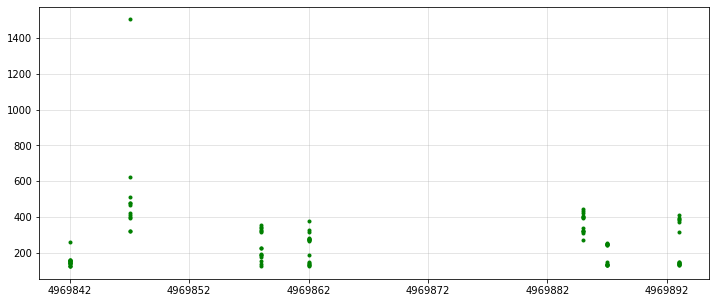

In [45]:
f, ax = plt.subplots(figsize=(12,5))
ax.plot(df['slot'], df['mics']/1000, 'g.')

ax.set_xticks(np.arange(min(df['slot']), max(df['slot'])+1, 10))

ax.ticklabel_format(style='plain')
ax.ticklabel_format(useOffset=False)
ax.grid(alpha=0.4)
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")

plt.show()

In [50]:
set(df['slot'])

{4969842, 4969847, 4969858, 4969862, 4969885, 4969887, 4969893}

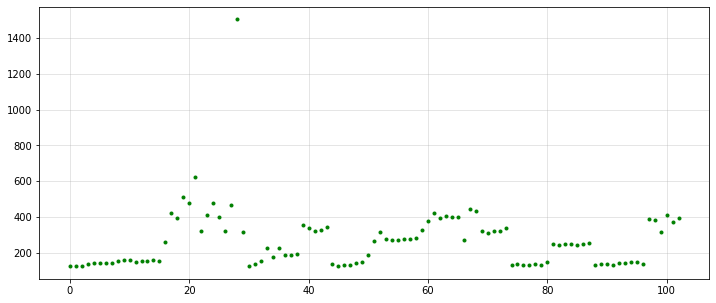

In [48]:
f, ax = plt.subplots(figsize=(12,5))

ax.plot(np.arange(len(df['slot'].values)), df['mics']/1000, 'g.')

# ax.set_xticks(np.arange(min(df['slot']), max(df['slot'])+1, 10))

ax.ticklabel_format(style='plain')
ax.ticklabel_format(useOffset=False)
ax.grid(alpha=0.4)
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")

plt.show()

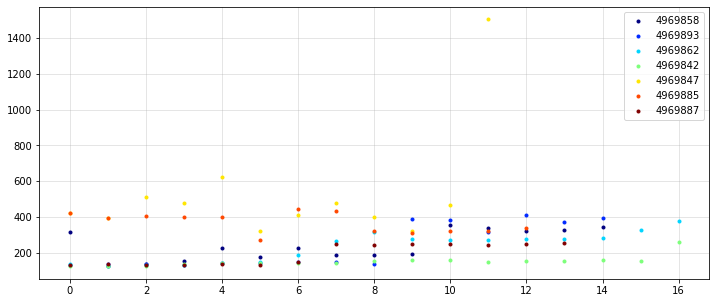

In [53]:
slots = set(df['slot'])
f, ax = plt.subplots(figsize=(12,5))

colors = plt.cm.jet(np.linspace(0,1,len(slots)))
for i, s in enumerate(slots):
    vals = df[df['slot'] == s]['mics'] / 1000
    ax.plot(np.arange(len(vals)), vals, '.', color=colors[i], label='{}'.format(s))


ax.ticklabel_format(style='plain')
ax.ticklabel_format(useOffset=False)
ax.grid(alpha=0.4)
ax.legend()

plt.show()

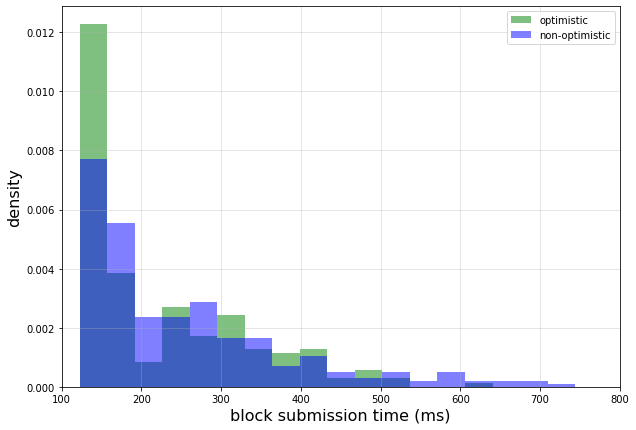

In [133]:
slots = set(df['slot'])
f, ax = plt.subplots(figsize=(10,7))

bins=np.histogram(np.hstack((df['mics']/1000,df2['mics']/1000)), bins=40)[1]

ax.hist(df['mics']/1000, bins=bins, label='optimistic', color='g', alpha=0.5, density=True)
ax.hist(df2['mics']/1000, bins=bins, label='non-optimistic', color='b', alpha=0.5, density=True)

ax.set_xlim(int(1e2), int(8e2))
ax.grid(alpha=0.4)
ax.legend()

ax.set_xlabel('block submission time (ms)', size=16)
ax.set_ylabel('density', size=16)
plt.show()

In [66]:
bins

array([ 123920.   ,  158420.375,  192920.75 ,  227421.125,  261921.5  ,
        296421.875,  330922.25 ,  365422.625,  399923.   ,  434423.375,
        468923.75 ,  503424.125,  537924.5  ,  572424.875,  606925.25 ,
        641425.625,  675926.   ,  710426.375,  744926.75 ,  779427.125,
        813927.5  ,  848427.875,  882928.25 ,  917428.625,  951929.   ,
        986429.375, 1020929.75 , 1055430.125, 1089930.5  , 1124430.875,
       1158931.25 , 1193431.625, 1227932.   , 1262432.375, 1296932.75 ,
       1331433.125, 1365933.5  , 1400433.875, 1434934.25 , 1469434.625,
       1503935.   ])

No handles with labels found to put in legend.


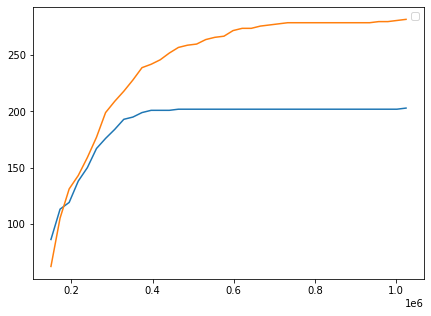

In [127]:
slots = set(df['slot'])
f, ax = plt.subplots(figsize=(7,5))

bins=np.histogram(np.hstack((df['mics'],df2['mics'])), bins=40)[1]

values, base = np.histogram(df['mics'], bins=40)
values2, base = np.histogram(df2['mics'], bins=40)

ax.plot(base[1:], np.cumsum(values))
ax.plot(base[1:], np.cumsum(values2))

# ax.hist(df['mics'], bins=bins, label='optimistic', color='g', alpha=0.5)
# ax.hist(df2['mics'], bins=bins, label='non-optimistic', color='r', alpha=0.5)

# ax.set_xlim(int(1e5), int(8e5))
# ax.grid(alpha=0.4)
ax.legend()

plt.show()

In [68]:
values, base = np.histogram(df['mics'], bins=40)
values, base

(array([39,  7,  0, 10,  8, 12,  4,  8,  8,  2,  2,  1,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1]),
 array([ 123920.   ,  158420.375,  192920.75 ,  227421.125,  261921.5  ,
         296421.875,  330922.25 ,  365422.625,  399923.   ,  434423.375,
         468923.75 ,  503424.125,  537924.5  ,  572424.875,  606925.25 ,
         641425.625,  675926.   ,  710426.375,  744926.75 ,  779427.125,
         813927.5  ,  848427.875,  882928.25 ,  917428.625,  951929.   ,
         986429.375, 1020929.75 , 1055430.125, 1089930.5  , 1124430.875,
        1158931.25 , 1193431.625, 1227932.   , 1262432.375, 1296932.75 ,
        1331433.125, 1365933.5  , 1400433.875, 1434934.25 , 1469434.625,
        1503935.   ]))

In [70]:
cumulative = np.cumsum(values)
cumulative


array([ 39,  46,  46,  56,  64,  76,  80,  88,  96,  98, 100, 101, 101,
       101, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102,
       102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102,
       103])

In [113]:
len(df), len(df2)

(203, 282)

In [101]:
df2 = pd.read_csv('nonopttimes.csv')
df2.head()

,slot,mics
0,4969958,139483
1,4969958,133676
2,4969958,128424
3,4969958,129174
4,4969958,131046


In [141]:
percentiles = np.arange(0,1,0.01)

cdf = [np.quantile(df['mics']/1000, q) for q in percentiles]
cdf2 = [np.quantile(df2['mics']/1000, q) for q in percentiles]


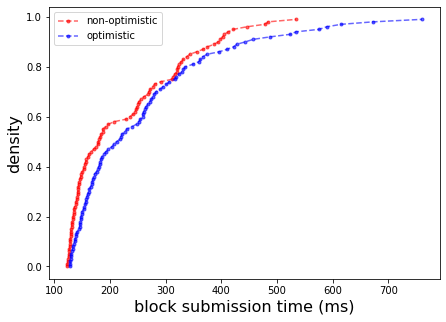

In [142]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(cdf, percentiles, 'r.--', alpha=0.6, label='non-optimistic')
ax.plot(cdf2, percentiles, 'b.--', alpha=0.6, label='optimistic')

# ax.set_xlim(int(1e2), int(8e2))
# ax.grid(alpha=0.4)
ax.legend()

ax.set_xlabel('block submission time (ms)', size=16)
ax.set_ylabel('density', size=16)
plt.show()

In [130]:
df2['mics'].min()

127569